In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


## Análisis Preliminar

In [4]:
df = pd.read_csv('diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Surge la pregunta: variables como *Pregnancies, glucose, BloodPressure,SkinThickness,Insulin,BMI* pueden ser 0? De acuerdo al análisis tienen datos mínimos en 0.
Se debe corregir esto.

## Corrección de los datos

In [9]:
df_copy = df.copy(deep = True)  #deep = True indica que la copia no guarda relacion con el original y los cambios no se trasladan

#Corregimos los datos
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
## showing the count of Nans
print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


Ahora, para llenar estos NaN, la distribucion de los datos debe ser comprendida.

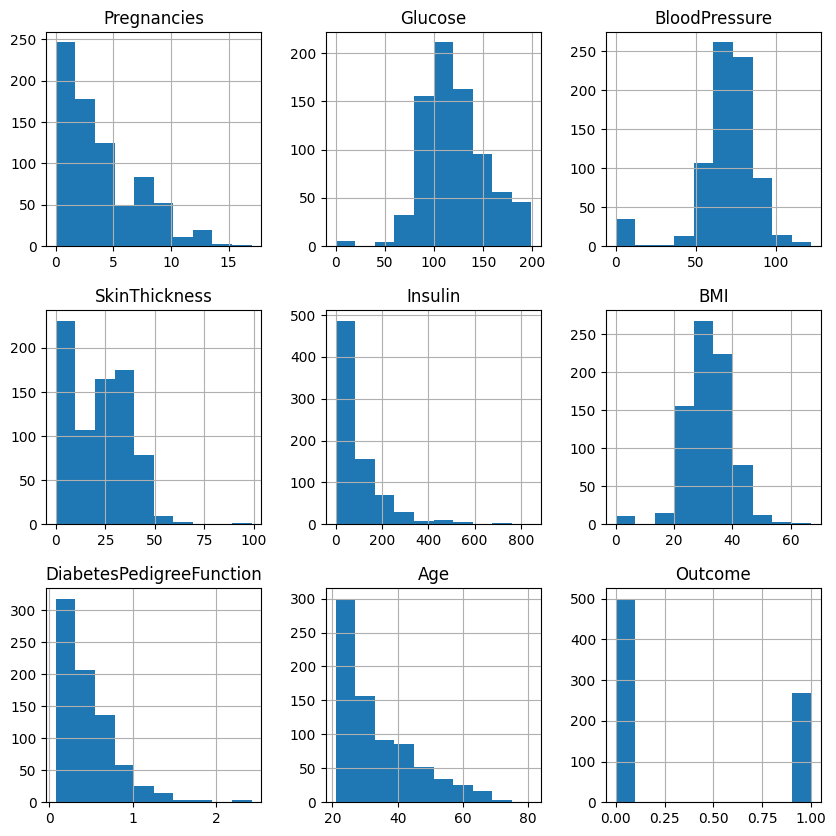

In [10]:
p = df.hist(figsize = (10,10))

La idea es llenar los valores NaN con datos que se ajusten a la distribución

In [11]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(),inplace= True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(),inplace= True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].mean(),inplace= True)
df_copy['Insulin'].fillna(df_copy['Insulin'].mean(),inplace= True)
df_copy['BMI'].fillna(df_copy['BMI'].mean(),inplace= True)

/tmp/ipykernel_2244/2433886284.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['Glucose'].fillna(df_copy['Glucose'].mean(),inplace= True)
/tmp/ipykernel_2244/2433886284.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

Plot despues de la remoción de NaN

In [12]:
print(df_copy.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


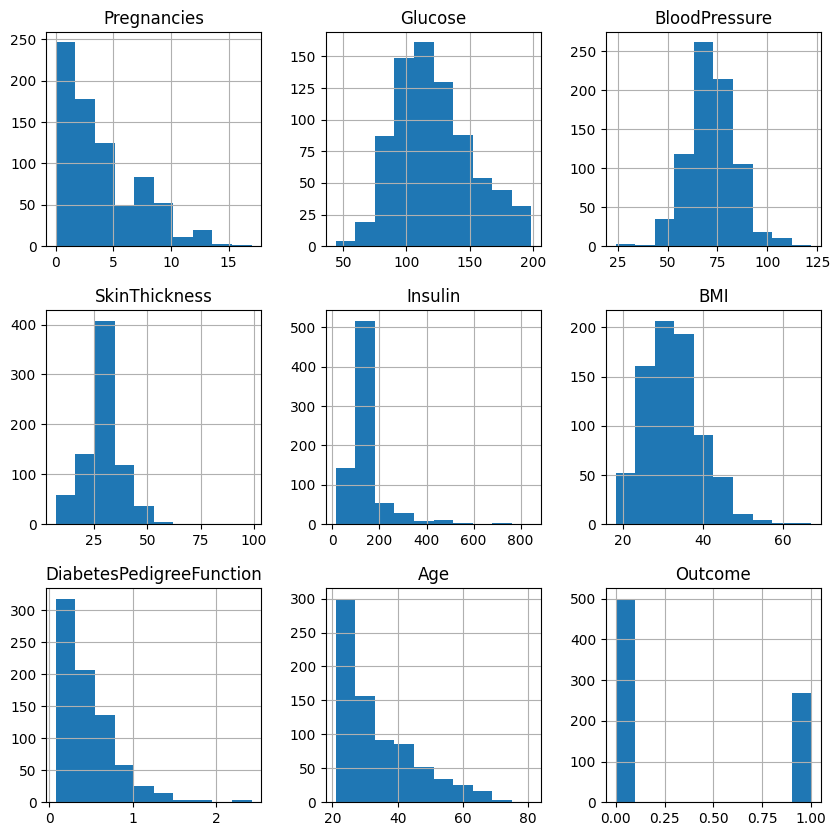

In [13]:
p = df_copy.hist(figsize = (10,10))

### Sesgo

Una distribución sesgada hacia la izquierda tiene una cola izquierda larga. Las distribuciones sesgadas hacia la izquierda también se denominan distribuciones sesgadas negativamente. Esto se debe a que hay una cola larga en la dirección negativa en la recta numérica. La media también está a la izquierda del pico.

Una distribución sesgada a la derecha tiene una cola derecha larga. Las distribuciones asimétricas a la derecha también se denominan distribuciones asimétricas positivas. Esto se debe a que hay una cola larga en dirección positiva en la recta numérica. La media también está a la derecha del pico.


referirse a:
https://statisticsbyjim.com/basics/skewed-distribution/

#### ejemplos de sesgo derecho

Las distribuciones sesgadas a la derecha son la forma más común. Estas distribuciones tienden a ocurrir cuando hay un límite inferior y la mayoría de los valores están relativamente cerca del límite inferior. Los valores no pueden ser menores que este límite, pero pueden alejarse mucho del pico en el extremo alto, lo que causa que se sesguen positivamente.

Por ejemplo, las distribuciones sesgadas a la derecha pueden ocurrir en los siguientes casos:

- El tiempo hasta el fallo no puede ser menor que cero, pero no hay un límite superior.
- Los tiempos de espera y de respuesta no pueden ser menores que cero, pero no hay límites superiores.
- Los datos de ventas no pueden ser menores que cero, pero pueden tener valores inusualmente altos.
- Los seres humanos tienen un peso mínimo viable, pero pueden tener valores extremos grandes.
- Los ingresos no pueden ser menores que cero, pero hay algunos ingresos extremadamente altos.

#### ejemplos de sesgo izquierdo

In [14]:
## Observamos la forma de los datos
df.shape

(768, 9)

Contamos el tipo de datos

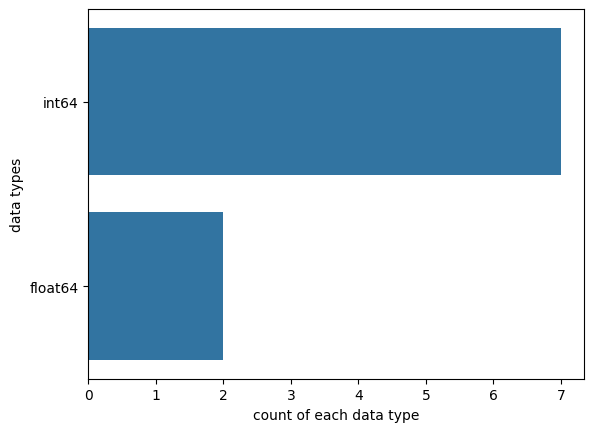

In [15]:
## data type analysis
#plt.figure(figsize=(5,5))
#sns.set(font_scale=2)
sns.countplot(y=df.dtypes ,data=df)
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()

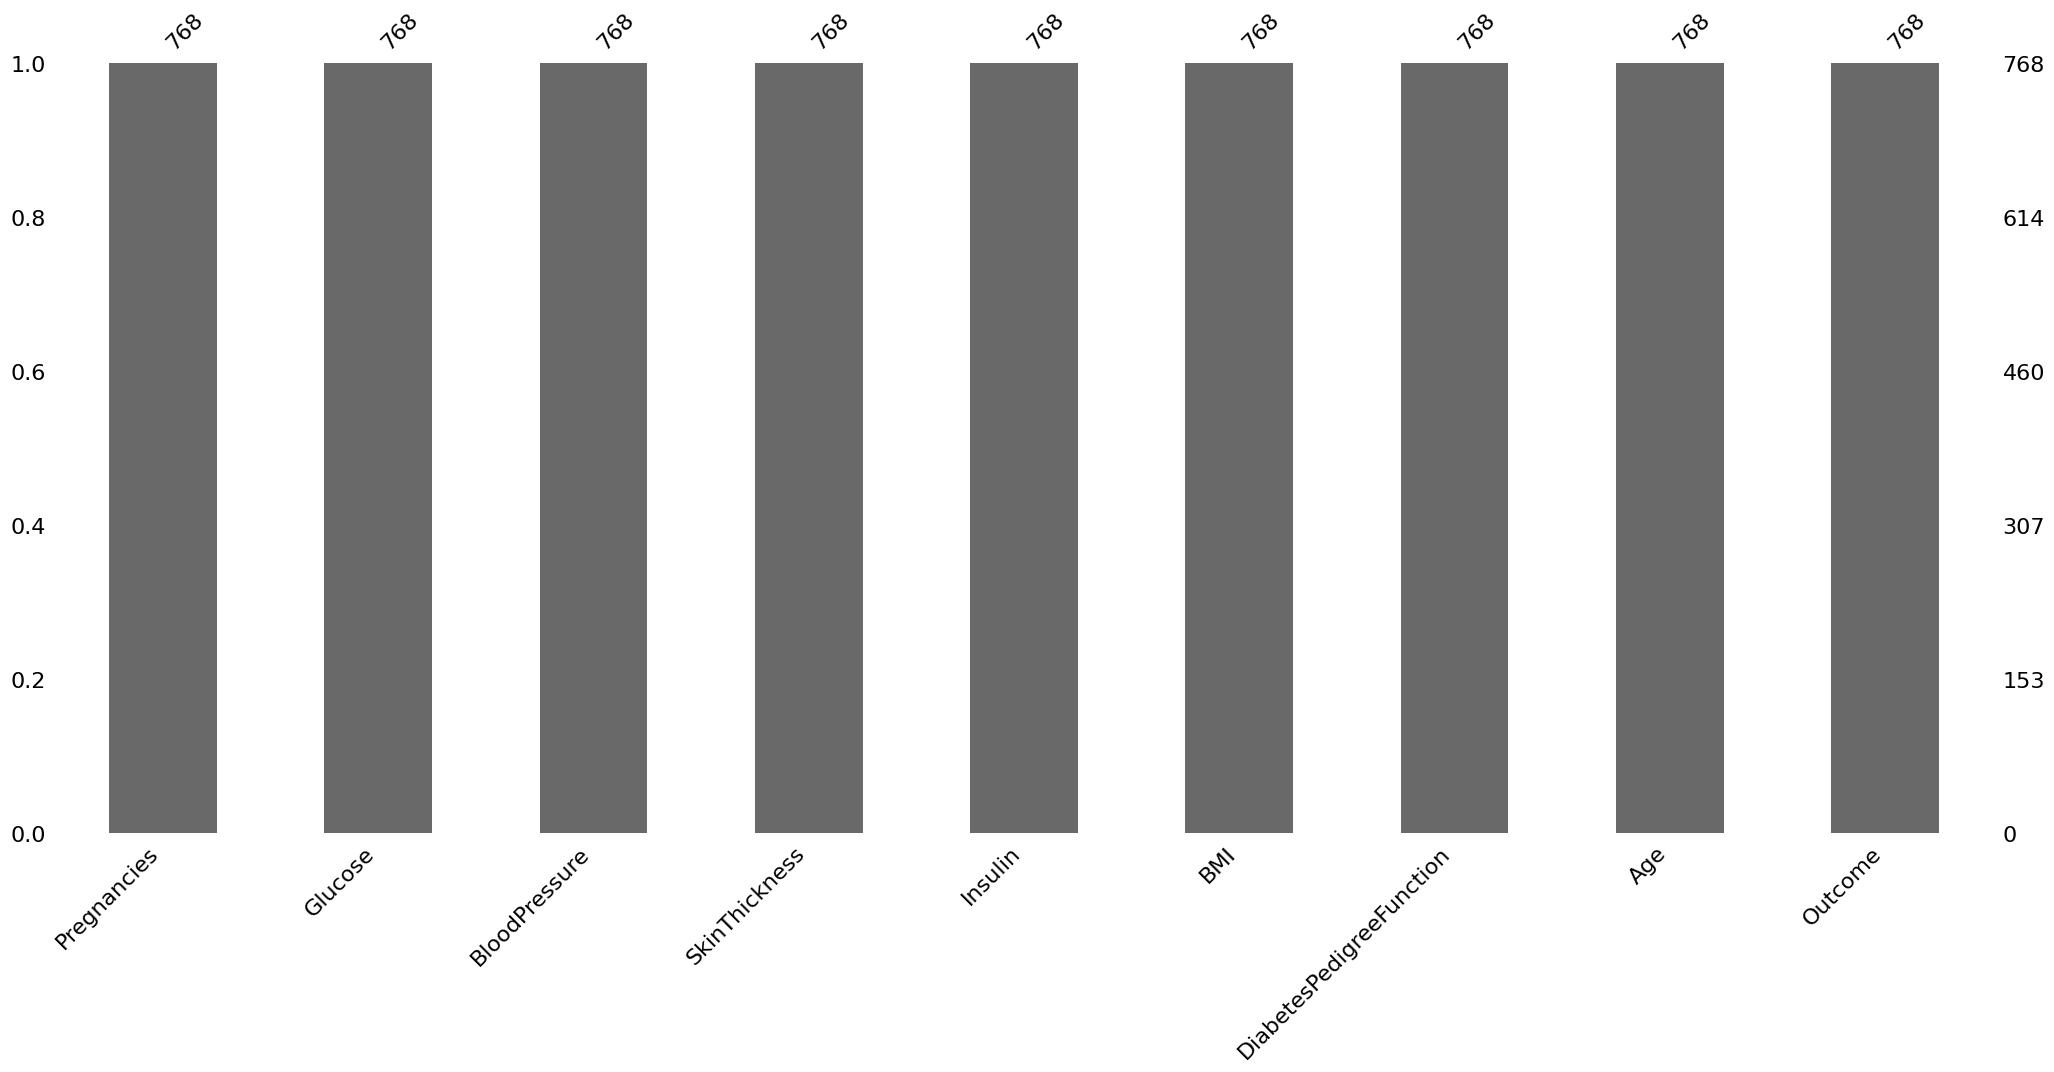

In [16]:
#analizamos conteo de datos nulos
import missingno as msno
p=msno.bar(df)

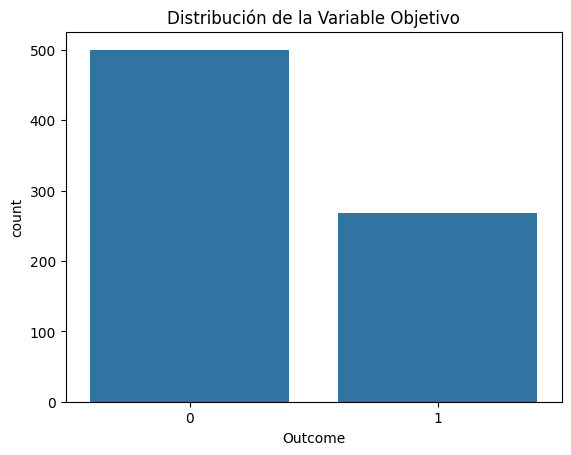

In [17]:
sns.countplot(x='Outcome', data=df_copy)
plt.title('Distribución de la Variable Objetivo')
plt.show()

El número de pacientes no diabéticos es casi el doble de los diabéticos

## Graficos de dispersion

### datos brutos

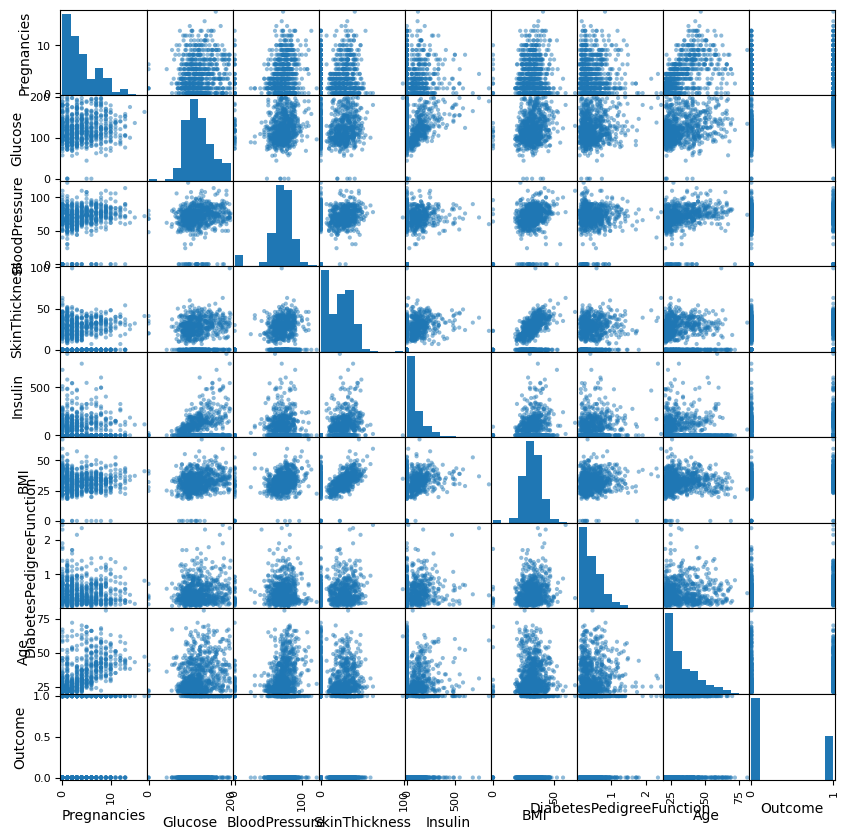

In [18]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(df,figsize=(10, 10))

datos análogos del dataset limpio

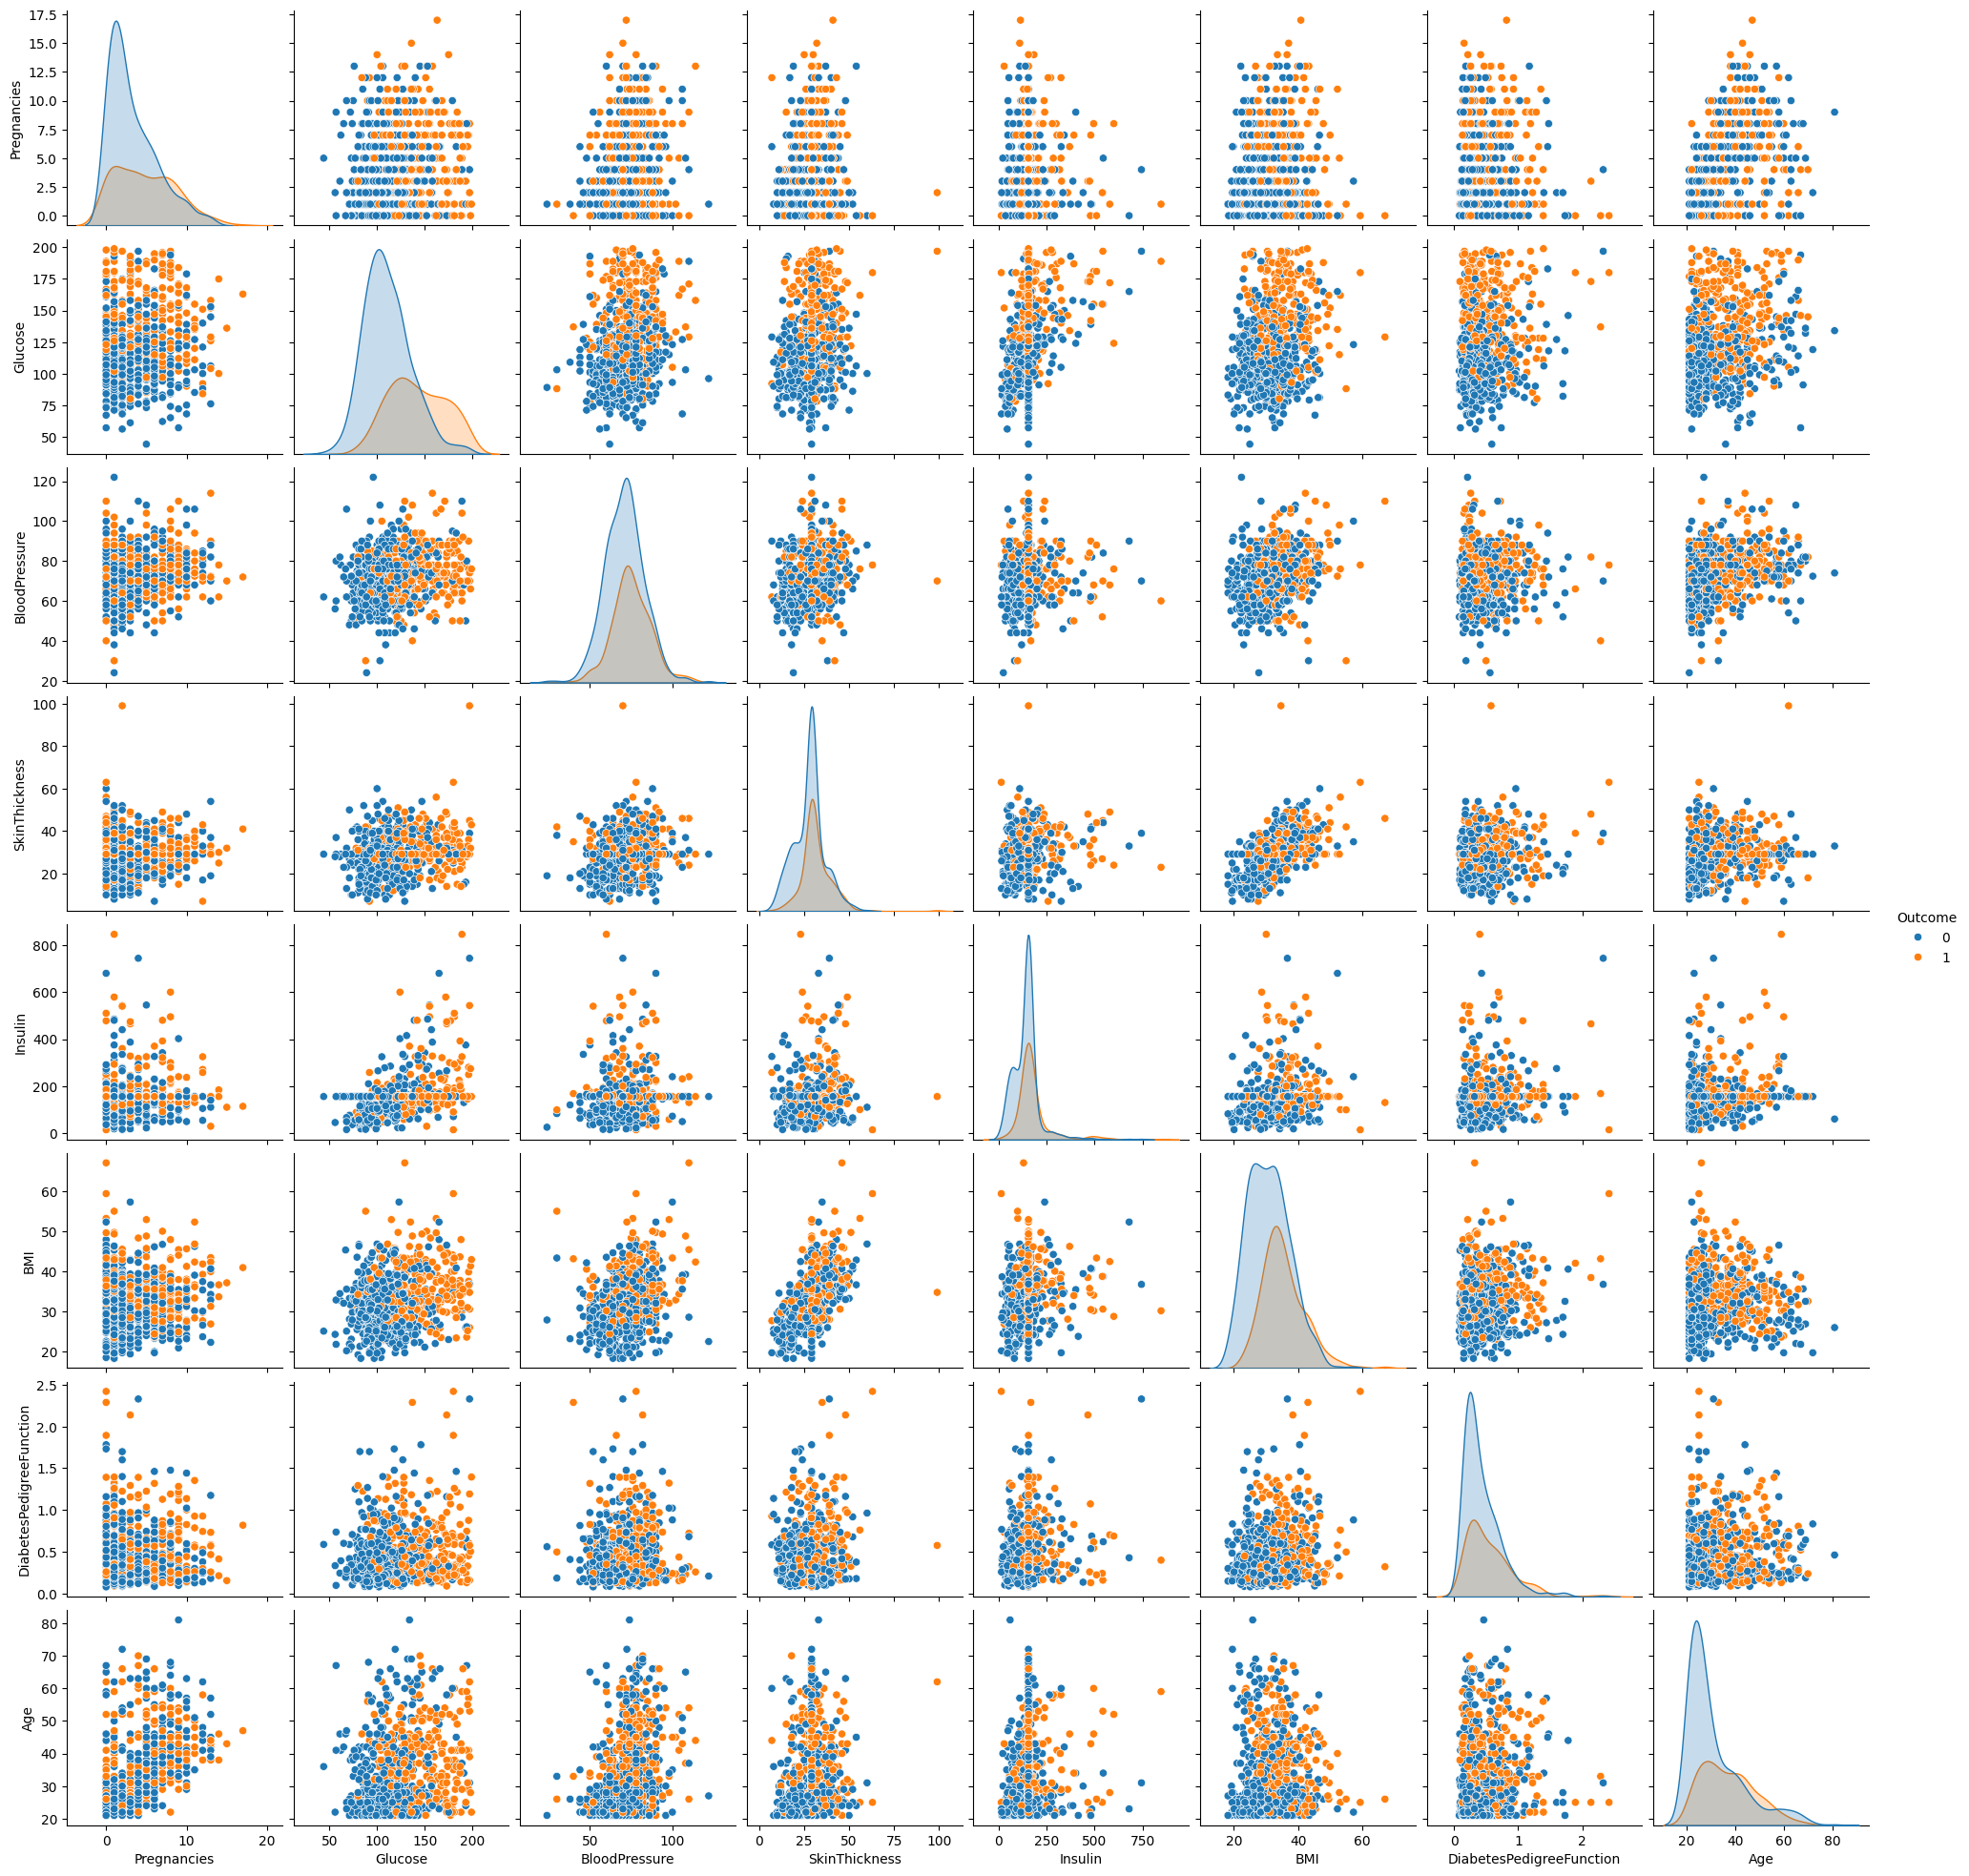

In [19]:
p=sns.pairplot(df_copy, hue = 'Outcome')

Coeficiente de correlación de Pearson: te ayuda a descubrir la relación entre dos cantidades. Le da la medida de la fuerza de asociación entre dos variables. El valor del coeficiente de correlación de Pearson puede estar entre -1 y +1. 1 significa que están altamente correlacionados y 0 significa que no hay correlación.

## Mapa de calor

Text(0.5, 1.0, 'Matriz de Correlación')

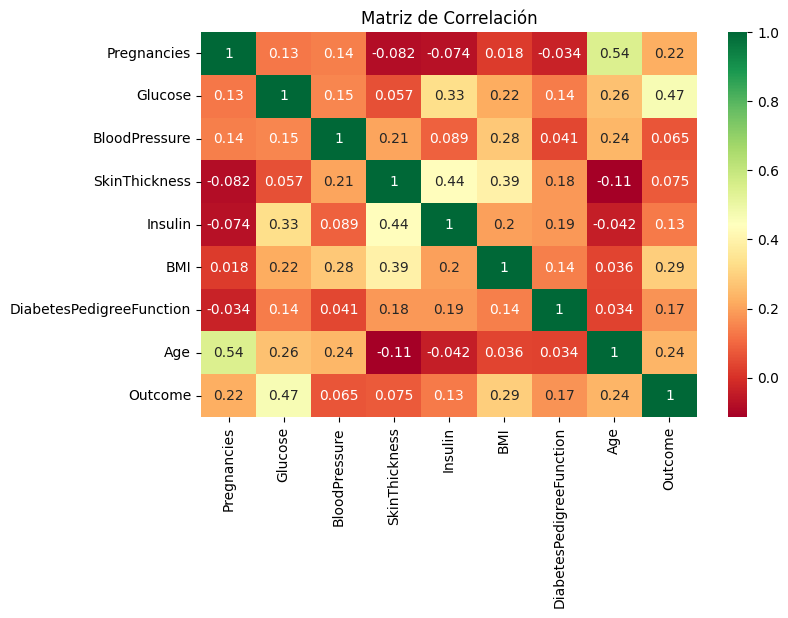

In [20]:
plt.figure(figsize=(8,5))  
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')
plt.title('Matriz de Correlación')

Para los datos limpios

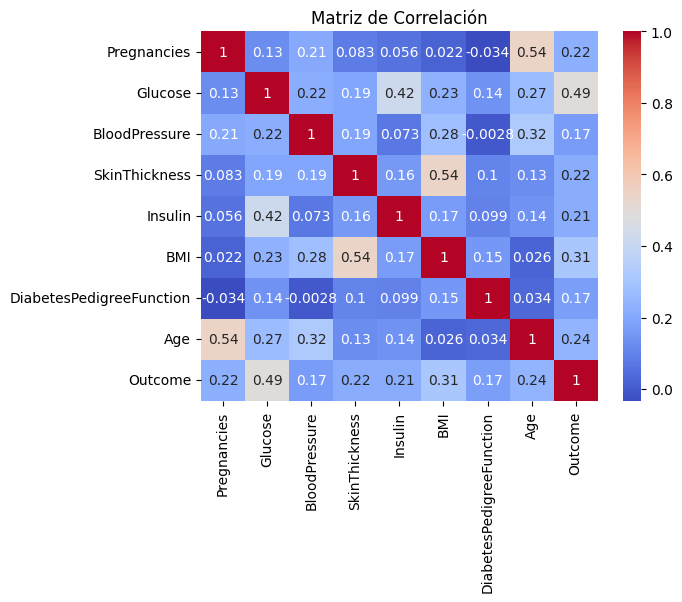

In [21]:
#plt.figure(figsize=(12,10))  
sns.heatmap(df_copy.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Los datos $z$ se reescalan de manera que $\mu$ y $\sigma$ = 1, y se realiza mediante esta fórmula:

de tal manera que:
$$
z = \frac{x_i - \mu}{\sigma}
$$



para aprender de escalado:

https://machinelearningmastery.com/rescaling-data-for-machine-learning-in-python-with-scikit-learn/

In [22]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [24]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496


In [26]:
#X = diabetes_data.drop("Outcome",axis = 1)
y = df_copy.Outcome

## Construcción del modelo

In [29]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [47]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []   

for i in range(1,15):

    knn = KNeighborsClassifier(i)   #i neighbors
    knn.fit(X_train,y_train)        #training
    
    train_scores.append(knn.score(X_train,y_train)) #train scores
    test_scores.append(knn.score(X_test,y_test))    #test scores
    #print(test_scores)

In [48]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [49]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 76.171875 % and k = [11]


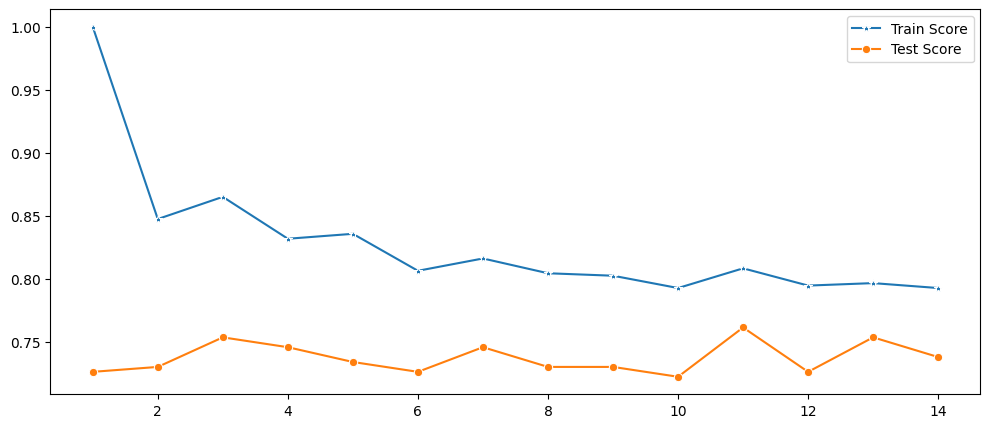

In [56]:
plt.figure(figsize=(12,5))
p = sns.lineplot(x = range(1,15),y = train_scores,marker='*',label='Train Score')
p = sns.lineplot(x = range(1,15),y = test_scores,marker='o',label='Test Score')

Mejor resultado con K = 11

In [57]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.76171875

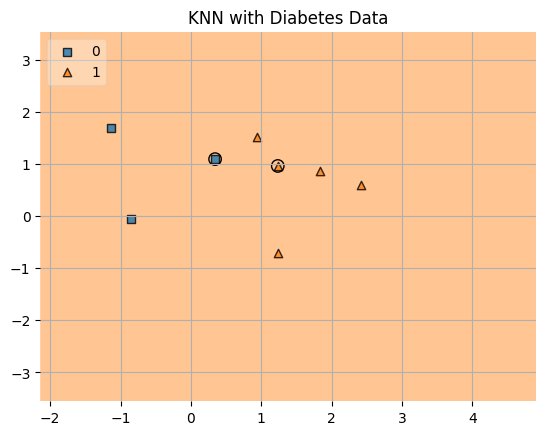

In [67]:

value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf=knn, legend=2, 
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values)

# Adding axes annotations
#plt.xlabel('sepal length [cm]')
#plt.ylabel('petal length [cm]')
plt.grid()
plt.title('KNN with Diabetes Data')
plt.show()

## Análisis de resultados

In [68]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,143,24,167
1,37,52,89
All,180,76,256


Text(0.5, 23.52222222222222, 'Predicted label')

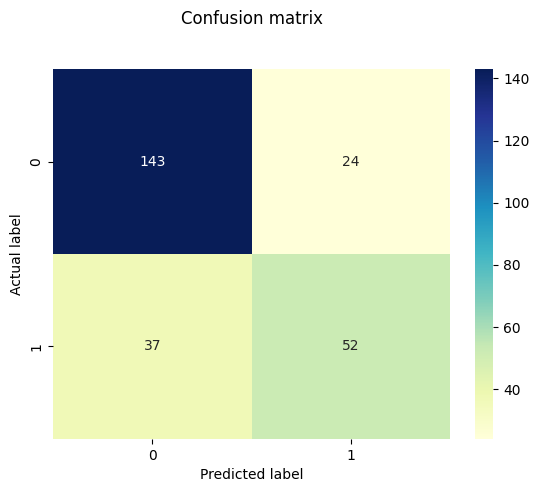

In [69]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Reporte

In [70]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       167
           1       0.68      0.58      0.63        89

    accuracy                           0.76       256
   macro avg       0.74      0.72      0.73       256
weighted avg       0.76      0.76      0.76       256



## Receiver operating characteristic

In [71]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

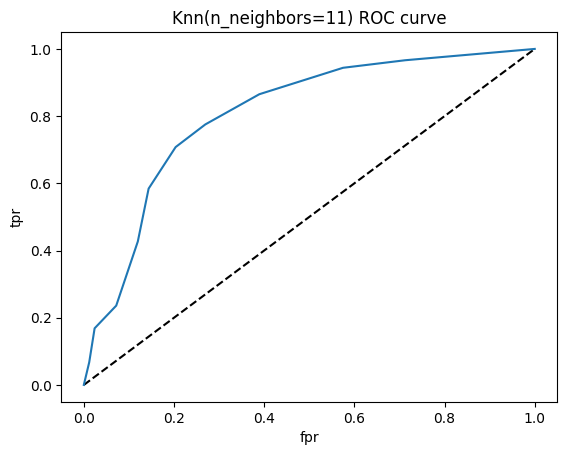

In [72]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [73]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8072730942609163

Contenido extraído, revisado y traducido a partir de:

https://www.kaggle.com/code/shrutimechlearn/step-by-step-diabetes-classification-knn-detailed
